#1. What is Simple Linear Regression?

Simple Linear Regression is a statistical method used to understand and model the relationship between one independent variable (X) and one dependent variable (Y) by fitting a straight line to observed data.

Core Idea

It assumes that the relationship between X and Y can be represented by a straight line:

𝑌=
𝛽
0 +
𝛽
1
𝑋
+
𝜀
​

Where:

Y = dependent (target) variable

X = independent (predictor) variable

𝛽
0
= intercept (value of Y when X = 0)

𝛽
1
= slope (change in Y for a one-unit change in X)

ε = error term (random noise)


What It Does:

Explains how Y changes as X changes

Predicts future values of Y based on X

Quantifies the strength and direction of the relationship

Example

If X = hours studied and Y = exam score, simple linear regression helps predict exam scores based on study time.


Key Assumptions:

Linear relationship between X and Y

Errors are independent

Constant variance of errors (homoscedasticity)

Errors are normally distributed

Where It’s Used:

Business forecasting

Economics and finance

Data analysis and machine learning basics

#2. What are the key assumptions of Simple Linear Regression?

The key assumptions of Simple Linear Regression ensure that the model’s results are valid and reliable. These are often remembered using LINE:

1. Linearity

The relationship between the independent variable (X) and dependent variable (Y) is linear.

The mean of Y changes at a constant rate with X.

2. Independence

Observations (and errors) are independent of each other.

No correlation between residuals (important for time-series data).

3. Normality of Errors

The residuals (errors) are normally distributed.

Mainly required for hypothesis testing and confidence intervals.

4. Equal Variance (Homoscedasticity)

The variance of errors is constant across all values of X.

No pattern (like a funnel shape) in residual plots.

#3. What is heteroscedasticity, and why is it important to address in regression models?

Instead of residuals being evenly spread around the regression line, their spread changes (often increases or decreases) as the value of X changes.

Example:

As income increases, the variability in spending may increase — low-income groups spend similarly, but high-income groups show wider variation.

Why It Is a Problem:-

Heteroscedasticity does not bias the regression coefficients, but it does affect inference:

Incorrect standard errors:

Leads to unreliable t-tests, F-tests, and confidence intervals.

Misleading significance tests:

Variables may appear statistically significant when they are not (or vice versa).

Inefficient estimates:

The model does not make optimal use of the data.

How to Detect It:

Residual vs. fitted value plot (funnel or pattern shape)

Breusch–Pagan test

White’s test

How to Fix or Reduce It:

Transform variables (log, square root)

Use robust (heteroscedasticity-consistent) standard errors

Weighted Least Squares (WLS)

Add missing explanatory variables



#4. What is Multiple Linear Regression?

Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₙ).

Y=β0​+β1​X1​+β2​X2​+⋯+βn​Xn​+ε

Where:

Y = dependent (target) variable

X₁, X₂, …, Xₙ = independent (predictor) variables

𝛽
0
= intercept

𝛽
1
,
𝛽
2
,
…
,
𝛽
𝑛
= coefficients showing the effect of each X on Y (holding others constant)

ε = error term

What It Does:

Estimates how each predictor individually affects Y

Controls for other variables while measuring one variable’s impact

Improves prediction accuracy compared to simple linear regression

Example:

Predicting house price (Y) using:

Size of house (X₁)

Number of bedrooms (X₂)

Location score (X₃)

Key Assumptions:

Linearity between predictors and Y

Independence of errors

Homoscedasticity (constant error variance)

Normality of errors

No multicollinearity among independent variables

Where It’s Used:

Business and marketing analytics

Finance and risk modeling

Operations and performance analysis



#5.  What is polynomial regression, and how does it differ from linear regression?

Polynomial Regression is an extension of linear regression used to model a non-linear relationship between the independent variable(s) and the dependent variable by adding polynomial terms (powers of X).

Linear Regression:

Y=β0​+β1​X+ε

Polynomial Regression:

Y=β0​+β1​X+β2​X2+ε

| Aspect           | Linear Regression | Polynomial Regression   |
| ---------------- | ----------------- | ----------------------- |
| Relationship     | Straight line     | Curved (non-linear)     |
| Model complexity | Simple            | More flexible           |
| Fit to data      | May underfit      | Can capture curvature   |
| Risk             | Low overfitting   | Higher overfitting risk |
| Interpretation   | Easier            | More complex            |


When to Use Polynomial Regression:-

When data shows a curved trend

When linear regression underfits the data

When relationships are not strictly linear but smooth



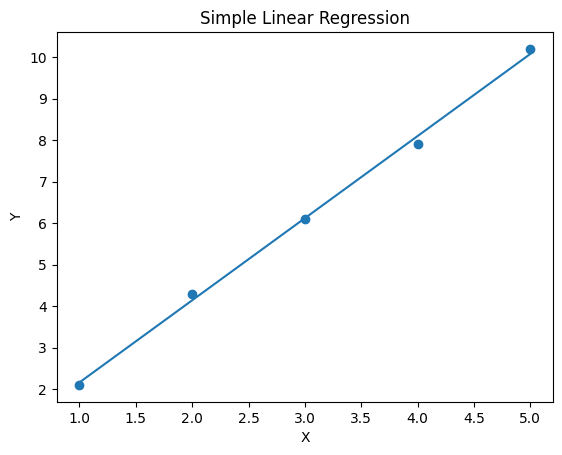

Slope (m): 1.98
Intercept (c): 0.17999999999999972


In [1]:
# Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Mean of X and Y
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Calculate slope (m) and intercept (c)
m = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)
c = y_mean - m * x_mean

# Predicted values
Y_pred = m * X + c

# Plot data points and regression line
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

# Print equation parameters
print("Slope (m):", m)
print("Intercept (c):", c)


In [2]:
#Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Given data
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

# Features and target
X = data[["Area", "Rooms"]]
y = data["Price"]

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Regression coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

intercept = model.intercept_

# Add constant for VIF calculation
X_const = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

coefficients, intercept, vif_data





(  Feature   Coefficient
 0    Area     63.157895
 1   Rooms  34736.842105,
 np.float64(103157.89473684214),
   Feature        VIF
 0   const  34.210526
 1    Area   7.736842
 2   Rooms   7.736842)

--- 2nd-Degree Polynomial Regression Results ---
Coefficients: [0.2  1.94 0.06]
Equation: Y = 0.2000X² + 1.9400X + 0.0600
------------------------------------------------


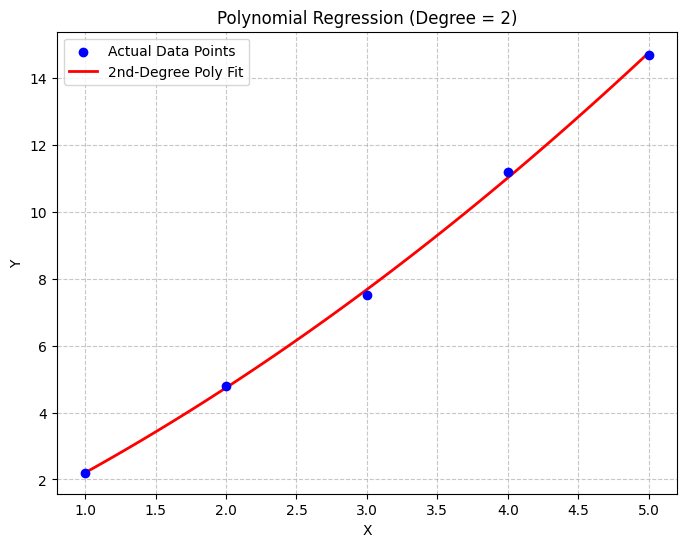

In [3]:
#Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.

import numpy as np
import matplotlib.pyplot as plt

# 1. Sample Data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# 2. Fit a 2nd-degree polynomial (quadratic)
# np.polyfit returns the coefficients [beta_2, beta_1, beta_0]
degree = 2
coefficients = np.polyfit(X, Y, degree)
p = np.poly1d(coefficients)

# 3. Generate points for a smooth curve plot
X_smooth = np.linspace(X.min(), X.max(), 100)
Y_smooth = p(X_smooth)

# 4. Display the results
print(f"--- 2nd-Degree Polynomial Regression Results ---")
print(f"Coefficients: {coefficients}")
print(f"Equation: Y = {coefficients[0]:.4f}X² + {coefficients[1]:.4f}X + {coefficients[2]:.4f}")
print("-" * 48)

# 5. Plotting
plt.figure(figsize=(8, 6))

# Plot the original data points
plt.scatter(X, Y, color='blue', label='Actual Data Points', zorder=5)

# Plot the polynomial curve
plt.plot(X_smooth, Y_smooth, color='red', linewidth=2, label=f'2nd-Degree Poly Fit')

plt.title('Polynomial Regression (Degree = 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Regression Equation: Y = 1.15X + 6.50
Predicted Y: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


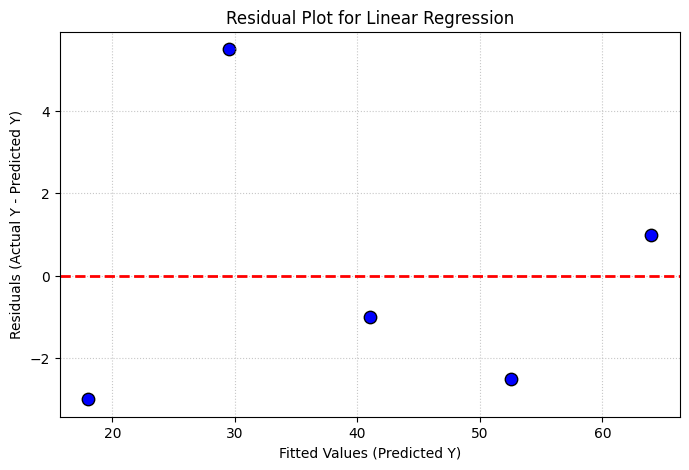

In [4]:
#Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.


import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([10, 20, 30, 40, 50])
Y = np.array([15, 35, 40, 50, 65])

# Simple Linear Regression
# Y = beta1 * X + beta0
beta1, beta0 = np.polyfit(X, Y, 1)
Y_pred = beta1 * X + beta0
residuals = Y - Y_pred

# Output results
print(f"Regression Equation: Y = {beta1:.2f}X + {beta0:.2f}")
print(f"Predicted Y: {Y_pred}")
print(f"Residuals: {residuals}")

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(Y_pred, residuals, color='blue', edgecolor='k', s=80)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Predicted Y)')
plt.ylabel('Residuals (Actual Y - Predicted Y)')
plt.title('Residual Plot for Linear Regression')
plt.grid(True, linestyle=':', alpha=0.7)
plt.savefig('residual_plot.png')


#10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

1. Addressing Heteroscedasticity (Non-constant variance of errors):-

Step 1: Detect the problem:

Visual checks: Plot residuals vs. predicted values (funnel shape indicates heteroscedasticity)

Statistical tests: Breusch–Pagan or White test

Step 2: Apply corrective measures:

Transform the target variable

Log or Box-Cox transform of house prices (very common in real estate)

Example: log(Price)

Transform predictors

Log-transform skewed variables like area

Use heteroscedasticity-robust standard errors

Ensures valid inference even if variance is not constant

Weighted Least Squares (WLS)

Assign lower weight to observations with higher variance

Step 3: Re-evaluate:

Recheck residual plots and statistical tests after transformation

2. Addressing Multicollinearity (Highly correlated predictors):

Step 1: Detect the problem:

Correlation matrix

Variance Inflation Factor (VIF)

VIF > 5 → moderate

VIF > 10 → severe multicollinearity

Step 2: Reduce multicollinearity:

Remove redundant features

Example: If Area and Built-up Area are highly correlated, keep one

Feature engineering

Combine correlated variables (e.g., price per sq. ft.)

Regularization techniques

Ridge Regression → shrinks coefficients, good for multicollinearity

Lasso Regression → feature selection + regularization

Principal Component Analysis (PCA)

Useful if prediction is more important than interpretability

Step 3: Recheck VIF:

Ensure VIF values are within acceptable limits

3. Ensuring a Robust Final Model:

Cross-validation to test generalization

Out-of-sample testing using hold-out data

Check model assumptions again

Linearity, normality of residuals, independence

Use domain knowledge

Validate coefficients (e.g., price should increase with area)